In [2]:
%load_ext autoreload
%autoreload 2
import ziff.ziff 

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("test")

10:41:25 INFO:test


In [3]:
imgs = ['/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q{}_sciimg.fits'.format(i+1) for i in range(4)]


In [4]:
import ziff.ziff
z = ziff.ziff.Ziff(imgs,logger=logger,load_default_cat= True, build_default_cat = True)
z.compute_shapes
z.read_shapes()

Loading default catalogs


FileNotFoundError: [Errno 2] No such file or directory: '/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_shapes.npz'

/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_calibcat_marg.fits
/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_calibration.fits
/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_full.fits
/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_mskimg.fits
/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_mskimg.fits.md5
/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_output.piff
/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_piff_config.json
/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_psfcat.fits
/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_psfcat.fits.md5
/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_psfcat_sky.fits
/Us

# WITHOUT MAP

In [33]:
z = ziff.ziff.Ziff(imgs,logger=logger,load_default_cat= True, build_default_cat = True)

Loading default catalogs


In [34]:
z.set_config_value('psf,interp,order',4)
z.set_config_value('psf,outliers,max_remove',20)
#z.set_config_value('psf,interp,interpolation_map_file','/Users/graziani/libs/Ziff/notebooks/interpolator.pkl')
#z.set_config_value('psf,interp,type','BasisPolynomialPlusMap')



In [35]:
z.run_piff('gaia_calibration',overwrite_cat=True)

08:12:16 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
08:12:16 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
08:12:16 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
08:12:17 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
08:12:18 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
08:12:19 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
08:12:19 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg

In [36]:
z.set_config_value('i/o,nstars', 2000) 
stars = z.make_stars('gaia_calibration',overwrite_cat=False)
new_stars = z.reflux_stars(stars)
res = z.compute_residuals(new_stars)
shapes = z.compute_shapes(new_stars)

08:15:09 WARNING:Using already saved catalogs
08:15:10 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
08:15:10 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
08:15:10 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
08:15:10 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
08:15:10 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
08:15:10 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_calibration.fits.
08:15:10 INFO:Processing catalog 0 with 148 stars
08:15:10 WARNING:Reading image file /Users/

Processing 1/656
Processing 2/656
Processing 3/656
Processing 4/656
Processing 5/656
Processing 6/656
Processing 7/656
Processing 8/656
Processing 9/656
Processing 10/656
Processing 11/656
Processing 12/656
Processing 13/656
Processing 14/656
Processing 15/656
Processing 16/656
Processing 17/656
Processing 18/656
Processing 19/656
Processing 20/656
Processing 21/656
Processing 22/656
Processing 23/656
Processing 24/656
Processing 25/656
Processing 26/656
Processing 27/656
Processing 28/656
Processing 29/656
Processing 30/656
Processing 31/656
Processing 32/656
Processing 33/656
Processing 34/656
Processing 35/656
Processing 36/656
Processing 37/656
Processing 38/656
Processing 39/656
Processing 40/656
Processing 41/656
Processing 42/656
Processing 43/656
Processing 44/656
Processing 45/656
Processing 46/656
Processing 47/656
Processing 48/656
Processing 49/656
Processing 50/656
Processing 51/656
Processing 52/656
Processing 53/656
Processing 54/656
Processing 55/656
Processing 56/656
P

Processing 454/656
Processing 455/656
Processing 456/656
Processing 457/656
Processing 458/656
Processing 459/656
Processing 460/656
Processing 461/656
Processing 462/656
Processing 463/656
Processing 464/656
Processing 465/656
Processing 466/656
Processing 467/656
Processing 468/656
Processing 469/656
Processing 470/656
Processing 471/656
Processing 472/656
Processing 473/656
Processing 474/656
Processing 475/656
Processing 476/656
Processing 477/656
Processing 478/656
Processing 479/656
Processing 480/656
Processing 481/656
Processing 482/656
Processing 483/656
Processing 484/656
Processing 485/656
Processing 486/656
Processing 487/656
Processing 488/656
Processing 489/656
Processing 490/656
Processing 491/656
Processing 492/656
Processing 493/656
Processing 494/656
Processing 495/656
Processing 496/656
Processing 497/656
Processing 498/656
Processing 499/656
Processing 500/656
Processing 501/656
Processing 502/656
Processing 503/656
Processing 504/656
Processing 505/656
Processing 5

<IPython.core.display.Javascript object>


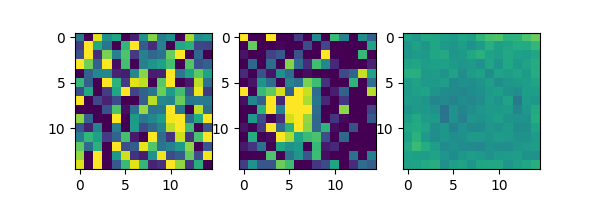

In [37]:
%matplotlib notebook
fig, axes = P.subplots(1,3,figsize=(6,2))
axes[0].imshow(res[0],vmin=-0.05,vmax=0.05)
axes[1].imshow(res[100],vmin=-0.05,vmax=0.05)
axes[2].imshow(N.mean(res,axis=0),vmin=-0.05,vmax=0.05)




<IPython.core.display.Javascript object>


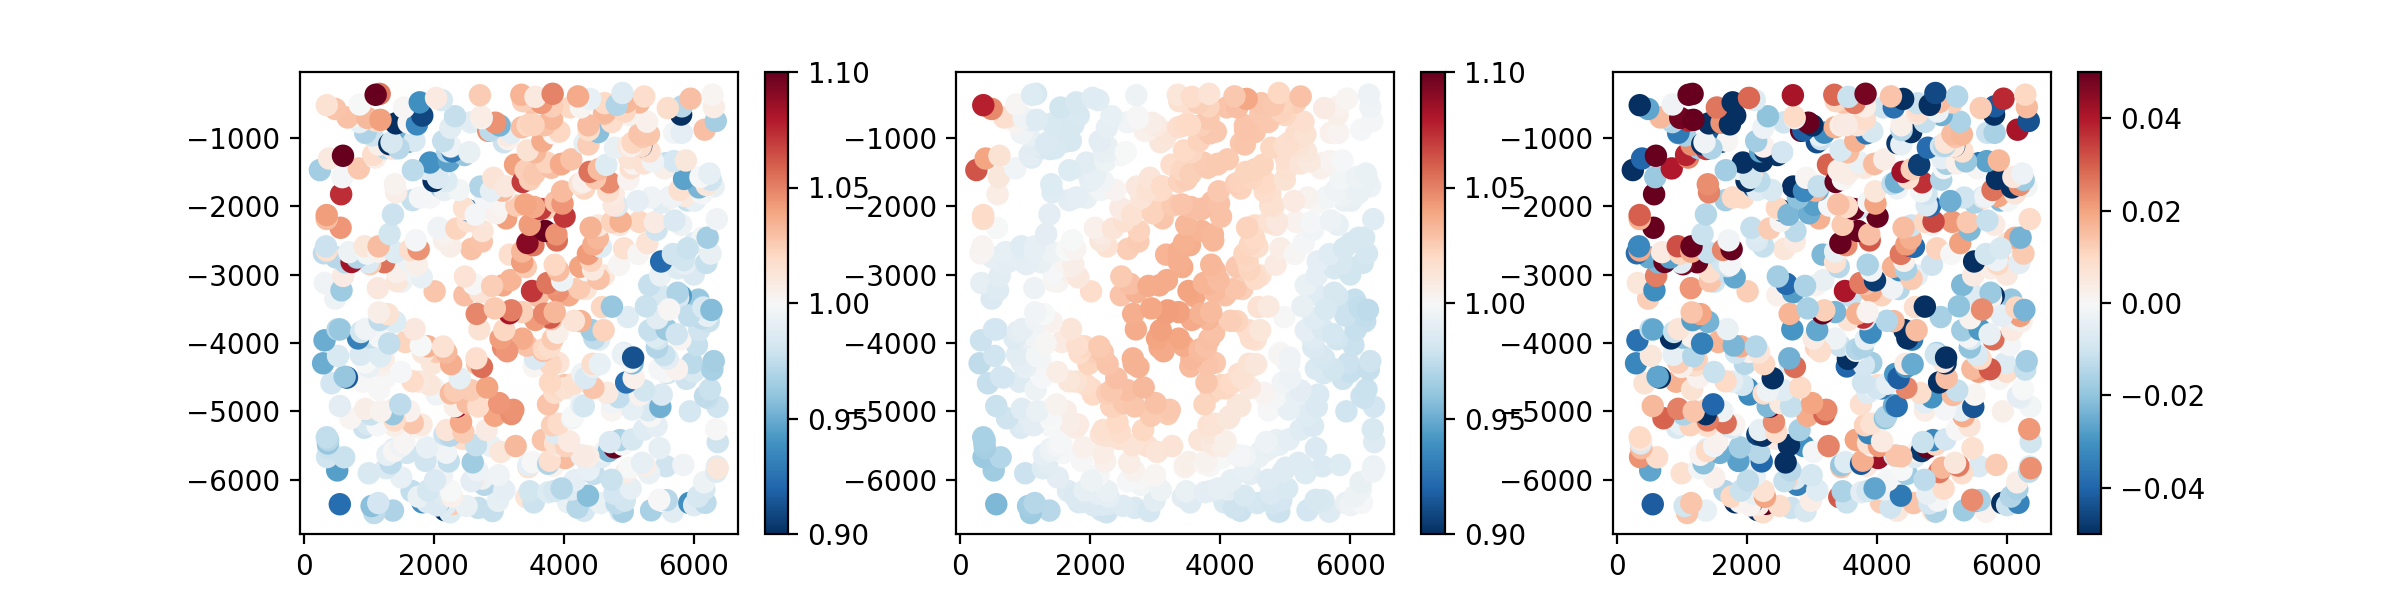

In [49]:
np = N
fig, axes = P.subplots(1,3,figsize=(12,3))
cmap = 'RdBu_r'
s = axes[0].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data_normalized']),s=50,vmin=0.9,vmax=1.1,cmap=cmap)
fig.colorbar(s,ax=axes[0])
s = axes[1].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_model_normalized']),s=50,vmin=0.9,vmax=1.1,cmap=cmap)
fig.colorbar(s,ax=axes[1])

s = axes[2].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data'])-np.asarray(shapes['T_model']),s=50,vmin=-0.05,vmax=0.05,cmap=cmap)
fig.colorbar(s,ax=axes[2])

fig.savefig('/Users/graziani/temp/ccd7_size.pdf')

# WITH MAP

In [21]:
z = ziff.ziff.Ziff(imgs,logger=logger,load_default_cat= True, build_default_cat = True)
z.set_config_value('psf,interp,order',1)
z.set_config_value('psf,outliers,max_remove',20)
z.set_config_value('psf,interp,interpolation_map_file','/Users/graziani/libs/Ziff/notebooks/interpolator.pkl')
z.set_config_value('psf,interp,type','BasisPolynomialPlusMap')
z.run_piff('gaia_calibration',overwrite_cat=True)


Loading default catalogs


02:51:56 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
02:51:56 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
02:51:56 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
02:51:56 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
02:51:58 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
02:51:58 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
02:51:58 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg

In [22]:
z.set_config_value('i/o,nstars', 2000) 
stars = z.make_stars('gaia_calibration',overwrite_cat=False)
new_stars = z.reflux_stars(stars)
res = z.compute_residuals(new_stars)
shapes = z.compute_shapes(new_stars)

02:52:28 WARNING:Using already saved catalogs
02:52:28 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
02:52:28 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
02:52:28 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
02:52:28 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
02:52:29 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
02:52:29 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_calibration.fits.
02:52:29 INFO:Processing catalog 0 with 148 stars
02:52:29 WARNING:Reading image file /Users/

Processing 1/656
Processing 2/656
Processing 3/656
Processing 4/656
Processing 5/656
Processing 6/656
Processing 7/656
Processing 8/656
Processing 9/656
Processing 10/656
Processing 11/656
Processing 12/656
Processing 13/656
Processing 14/656
Processing 15/656
Processing 16/656
Processing 17/656
Processing 18/656
Processing 19/656
Processing 20/656
Processing 21/656
Processing 22/656
Processing 23/656
Processing 24/656
Processing 25/656
Processing 26/656
Processing 27/656
Processing 28/656
Processing 29/656
Processing 30/656
Processing 31/656
Processing 32/656
Processing 33/656
Processing 34/656
Processing 35/656
Processing 36/656
Processing 37/656
Processing 38/656
Processing 39/656
Processing 40/656
Processing 41/656
Processing 42/656
Processing 43/656
Processing 44/656
Processing 45/656
Processing 46/656
Processing 47/656
Processing 48/656
Processing 49/656
Processing 50/656
Processing 51/656
Processing 52/656
Processing 53/656
Processing 54/656
Processing 55/656
Processing 56/656
P

Processing 487/656
Processing 488/656
Processing 489/656
Processing 490/656
Processing 491/656
Processing 492/656
Processing 493/656
Processing 494/656
Processing 495/656
Processing 496/656
Processing 497/656
Processing 498/656
Processing 499/656
Processing 500/656
Processing 501/656
Processing 502/656
Processing 503/656
Processing 504/656
Processing 505/656
Processing 506/656
Processing 507/656
Processing 508/656
Processing 509/656
Processing 510/656
Processing 511/656
Processing 512/656
Processing 513/656
Processing 514/656
Processing 515/656
Processing 516/656
Processing 517/656
Processing 518/656
Processing 519/656
Processing 520/656
Processing 521/656
Processing 522/656
Processing 523/656
Processing 524/656
Processing 525/656
Processing 526/656
Processing 527/656
Processing 528/656
Processing 529/656
Processing 530/656
Processing 531/656
Processing 532/656
Processing 533/656
Processing 534/656
Processing 535/656
Processing 536/656
Processing 537/656
Processing 538/656
Processing 5

<IPython.core.display.Javascript object>


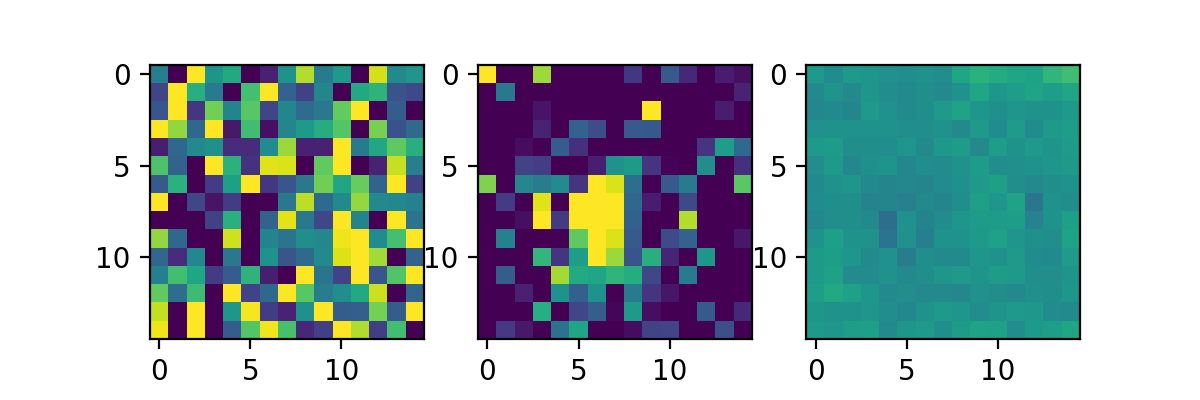

<IPython.core.display.Javascript object>


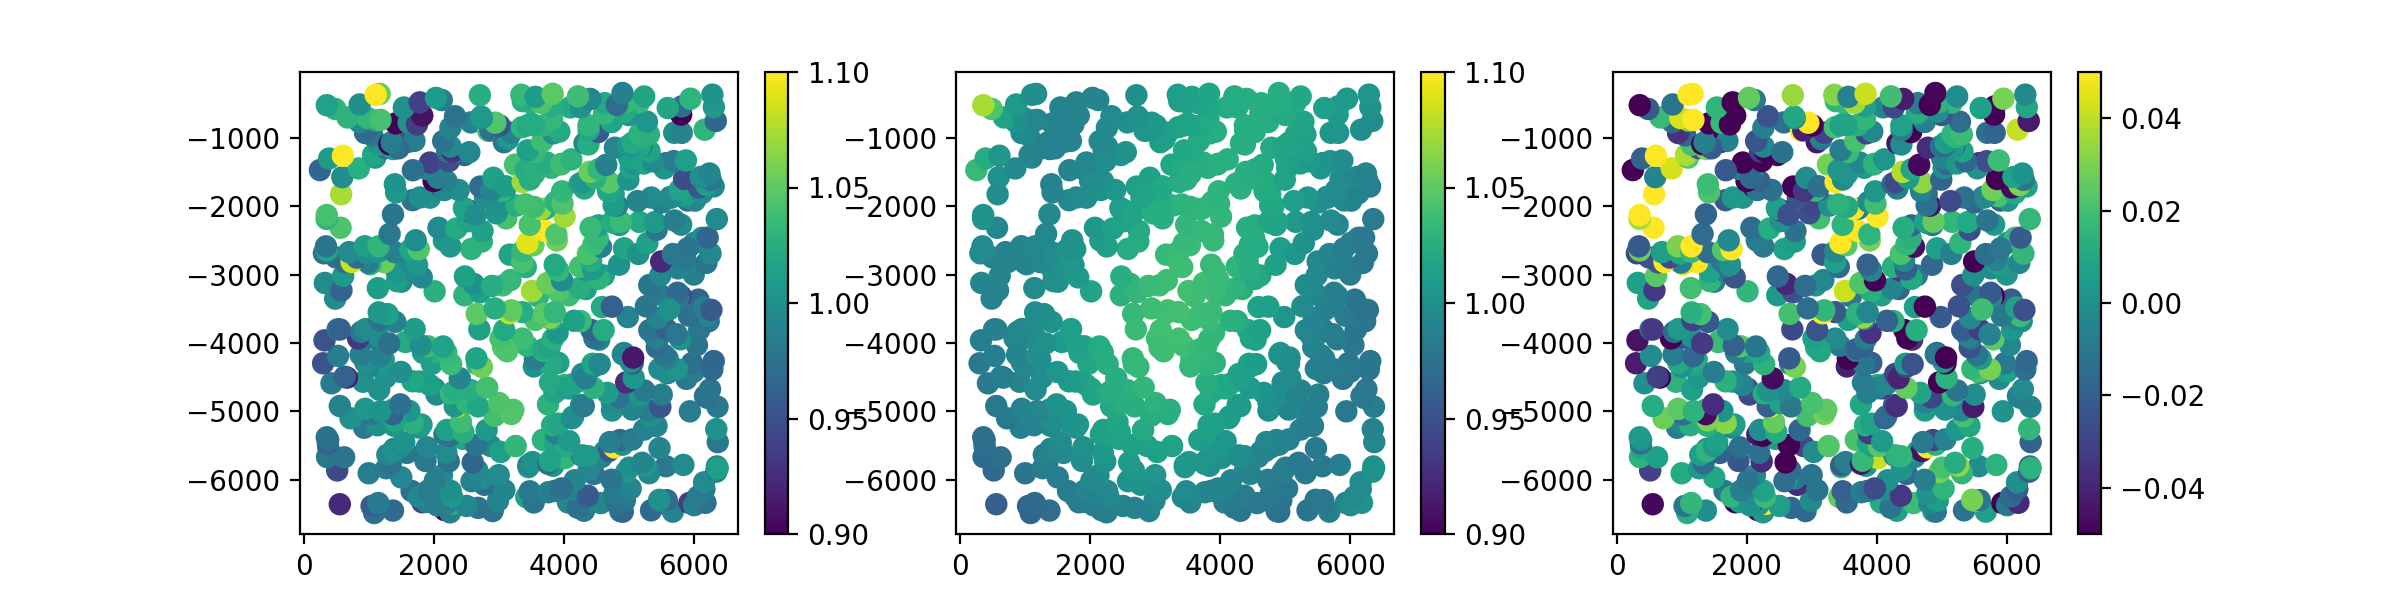

In [23]:
%matplotlib notebook
fig, axes = P.subplots(1,3,figsize=(6,2))
axes[0].imshow(res[0],vmin=-0.05,vmax=0.05)
axes[1].imshow(res[100],vmin=-0.05,vmax=0.05)
axes[2].imshow(N.mean(res,axis=0),vmin=-0.05,vmax=0.05)


np = N
fig, axes = P.subplots(1,3,figsize=(12,3))
s = axes[0].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data_normalized']),s=50,vmin=0.9,vmax=1.1)
fig.colorbar(s,ax=axes[0])
s = axes[1].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_model_normalized']),s=50,vmin=0.9,vmax=1.1)
fig.colorbar(s,ax=axes[1])

s = axes[2].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data'])-np.asarray(shapes['T_model']),s=50,vmin=-0.05,vmax=0.05)
fig.colorbar(s,ax=axes[2])

In [47]:
z.psf.interp.q[:,1]

array([ 2.18833919e-07, -1.26794107e-06, -1.27698755e-06, -2.18832462e-06,
       -1.08463140e-07, -1.18768220e-06, -1.40947494e-06,  1.28931801e-06,
       -8.24434048e-07, -8.74444835e-07, -5.46445986e-07,  1.13882973e-06,
       -1.41987882e-07, -1.96764670e-06, -1.08081052e-06, -6.05941368e-07,
       -1.16669695e-06,  5.08262347e-07, -1.52290163e-06, -1.45214029e-06,
       -4.17630845e-07,  6.50096961e-07, -7.20863207e-07, -2.77601071e-06,
       -1.54890267e-06, -1.33132485e-06, -1.43040739e-06, -9.32530940e-07,
       -8.60792002e-07, -8.96206718e-07,  1.93758376e-07,  6.10536499e-07,
       -9.99733023e-07, -8.05206711e-07, -1.12919307e-07, -5.20618027e-08,
       -2.07955702e-06,  7.86656839e-07, -5.94735695e-07, -1.13505998e-06,
       -1.38351948e-06, -3.21030479e-07, -3.00636036e-06, -7.02508255e-07,
       -1.16053741e-06, -2.31267301e-06,  1.39474682e-06, -1.13787322e-06,
       -2.08513787e-07, -1.29208824e-06, -1.89164651e-06, -3.10049314e-06,
       -3.66268700e-06, -

In [12]:
z.psf.interp

Loading default catalogs


AttributeError: 'Ziff' object has no attribute 'read_shapes'

# WITH MAP, HIGHER ORDER

In [39]:
z = ziff.ziff.Ziff(imgs,logger=logger,load_default_cat= True, build_default_cat = True)
z.set_config_value('psf,interp,order',4)
z.set_config_value('psf,outliers,max_remove',20)
z.set_config_value('psf,interp,interpolation_map_file','/Users/graziani/libs/Ziff/notebooks/interpolator.pkl')
z.set_config_value('psf,interp,type','BasisPolynomialPlusMap')
z.run_piff('gaia_calibration',overwrite_cat=True)


Loading default catalogs


08:26:23 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
08:26:23 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
08:26:23 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
08:26:23 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
08:26:25 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
08:26:25 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
08:26:25 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg

In [40]:
z.set_config_value('i/o,nstars', 2000) 
stars = z.make_stars('gaia_calibration',overwrite_cat=False)
new_stars = z.reflux_stars(stars)
res = z.compute_residuals(new_stars)
shapes = z.compute_shapes(new_stars)

08:32:04 WARNING:Using already saved catalogs
08:32:05 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
08:32:05 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
08:32:05 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
08:32:05 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
08:32:05 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
08:32:05 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_calibration.fits.
08:32:05 INFO:Processing catalog 0 with 148 stars
08:32:05 WARNING:Reading image file /Users/

Processing 1/656
Processing 2/656
Processing 3/656
Processing 4/656
Processing 5/656
Processing 6/656
Processing 7/656
Processing 8/656
Processing 9/656
Processing 10/656
Processing 11/656
Processing 12/656
Processing 13/656
Processing 14/656
Processing 15/656
Processing 16/656
Processing 17/656
Processing 18/656
Processing 19/656
Processing 20/656
Processing 21/656
Processing 22/656
Processing 23/656
Processing 24/656
Processing 25/656
Processing 26/656
Processing 27/656
Processing 28/656
Processing 29/656
Processing 30/656
Processing 31/656
Processing 32/656
Processing 33/656
Processing 34/656
Processing 35/656
Processing 36/656
Processing 37/656
Processing 38/656
Processing 39/656
Processing 40/656
Processing 41/656
Processing 42/656
Processing 43/656
Processing 44/656
Processing 45/656
Processing 46/656
Processing 47/656
Processing 48/656
Processing 49/656
Processing 50/656
Processing 51/656
Processing 52/656
Processing 53/656
Processing 54/656
Processing 55/656
Processing 56/656
P

Processing 441/656
Processing 442/656
Processing 443/656
Processing 444/656
Processing 445/656
Processing 446/656
Processing 447/656
Processing 448/656
Processing 449/656
Processing 450/656
Processing 451/656
Processing 452/656
Processing 453/656
Processing 454/656
Processing 455/656
Processing 456/656
Processing 457/656
Processing 458/656
Processing 459/656
Processing 460/656
Processing 461/656
Processing 462/656
Processing 463/656
Processing 464/656
Processing 465/656
Processing 466/656
Processing 467/656
Processing 468/656
Processing 469/656
Processing 470/656
Processing 471/656
Processing 472/656
Processing 473/656
Processing 474/656
Processing 475/656
Processing 476/656
Processing 477/656
Processing 478/656
Processing 479/656
Processing 480/656
Processing 481/656
Processing 482/656
Processing 483/656
Processing 484/656
Processing 485/656
Processing 486/656
Processing 487/656
Processing 488/656
Processing 489/656
Processing 490/656
Processing 491/656
Processing 492/656
Processing 4

<IPython.core.display.Javascript object>


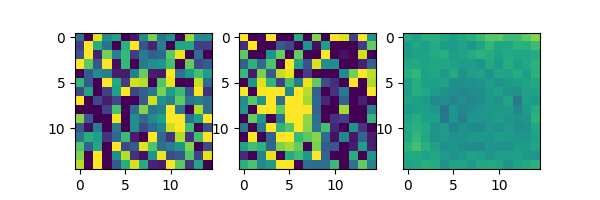

<IPython.core.display.Javascript object>


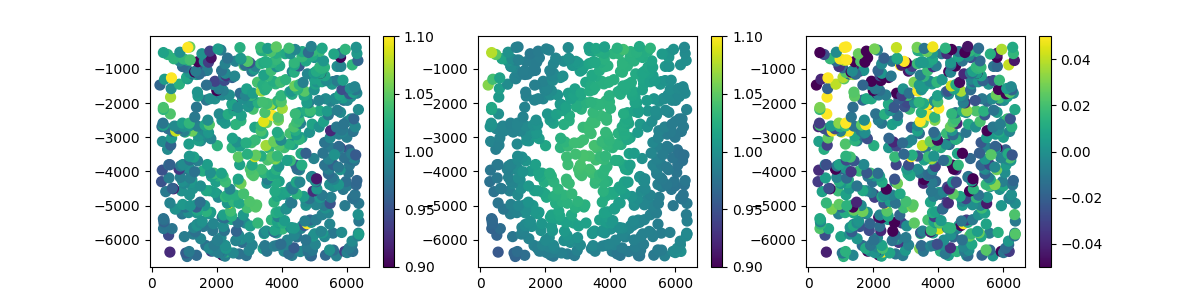

In [41]:
%matplotlib notebook
fig, axes = P.subplots(1,3,figsize=(6,2))
axes[0].imshow(res[0],vmin=-0.05,vmax=0.05)
axes[1].imshow(res[100],vmin=-0.05,vmax=0.05)
axes[2].imshow(N.mean(res,axis=0),vmin=-0.05,vmax=0.05)


np = N
fig, axes = P.subplots(1,3,figsize=(12,3))
s = axes[0].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data_normalized']),s=50,vmin=0.9,vmax=1.1)
fig.colorbar(s,ax=axes[0])
s = axes[1].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_model_normalized']),s=50,vmin=0.9,vmax=1.1)
fig.colorbar(s,ax=axes[1])

s = axes[2].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data'])-np.asarray(shapes['T_model']),s=50,vmin=-0.05,vmax=0.05)
fig.colorbar(s,ax=axes[2])

1.3759523865570955
[[ 300  300  300 ...  300  300  300]
 [ 310  310  310 ...  310  310  310]
 [ 320  320  320 ...  320  320  320]
 ...
 [5970 5970 5970 ... 5970 5970 5970]
 [5980 5980 5980 ... 5980 5980 5980]
 [5990 5990 5990 ... 5990 5990 5990]] [[-6000 -5990 -5980 ...  -330  -320  -310]
 [-6000 -5990 -5980 ...  -330  -320  -310]
 [-6000 -5990 -5980 ...  -330  -320  -310]
 ...
 [-6000 -5990 -5980 ...  -330  -320  -310]
 [-6000 -5990 -5980 ...  -330  -320  -310]
 [-6000 -5990 -5980 ...  -330  -320  -310]]


<IPython.core.display.Javascript object>


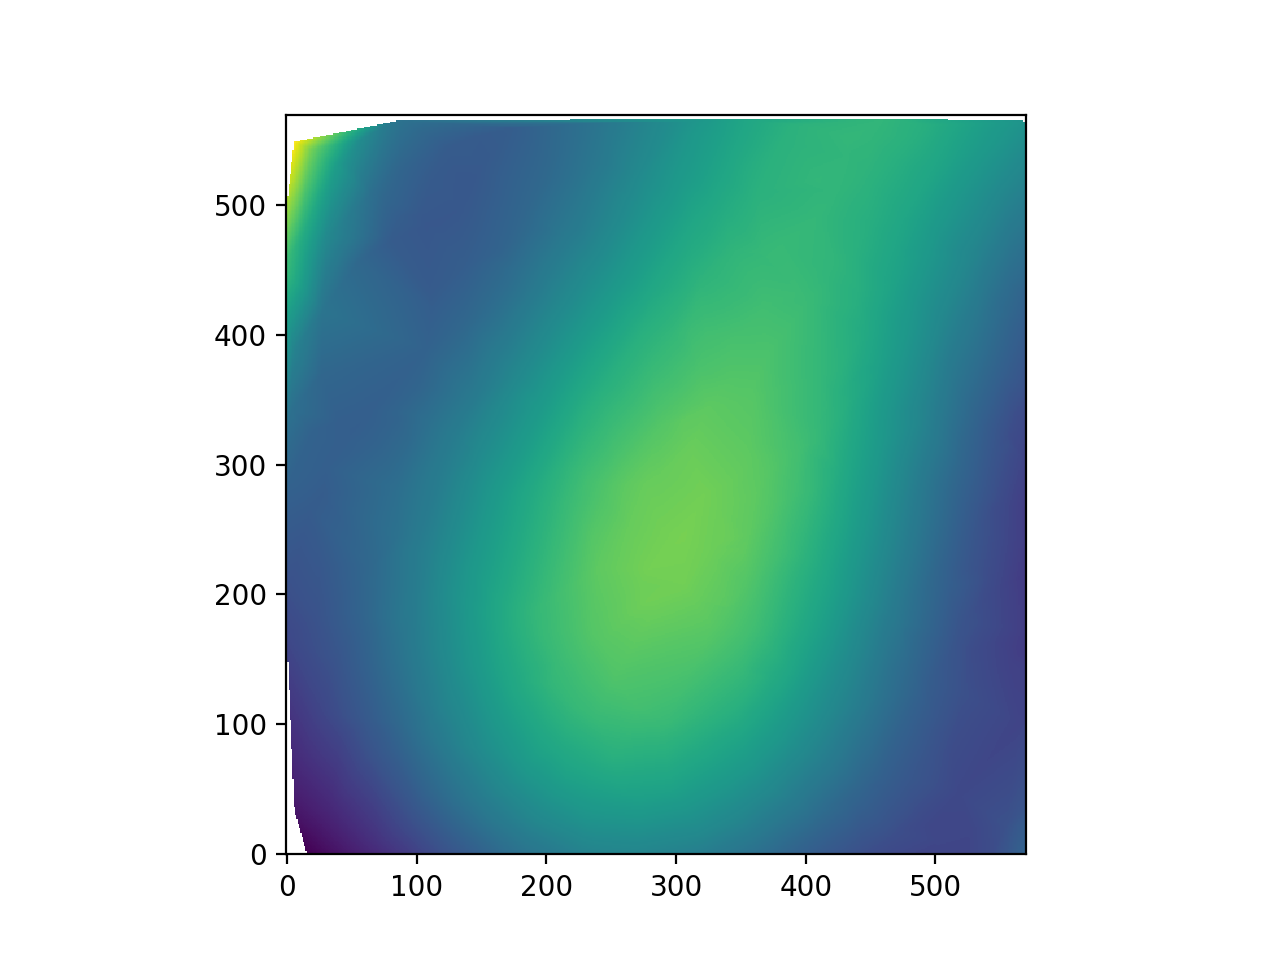

<IPython.core.display.Javascript object>


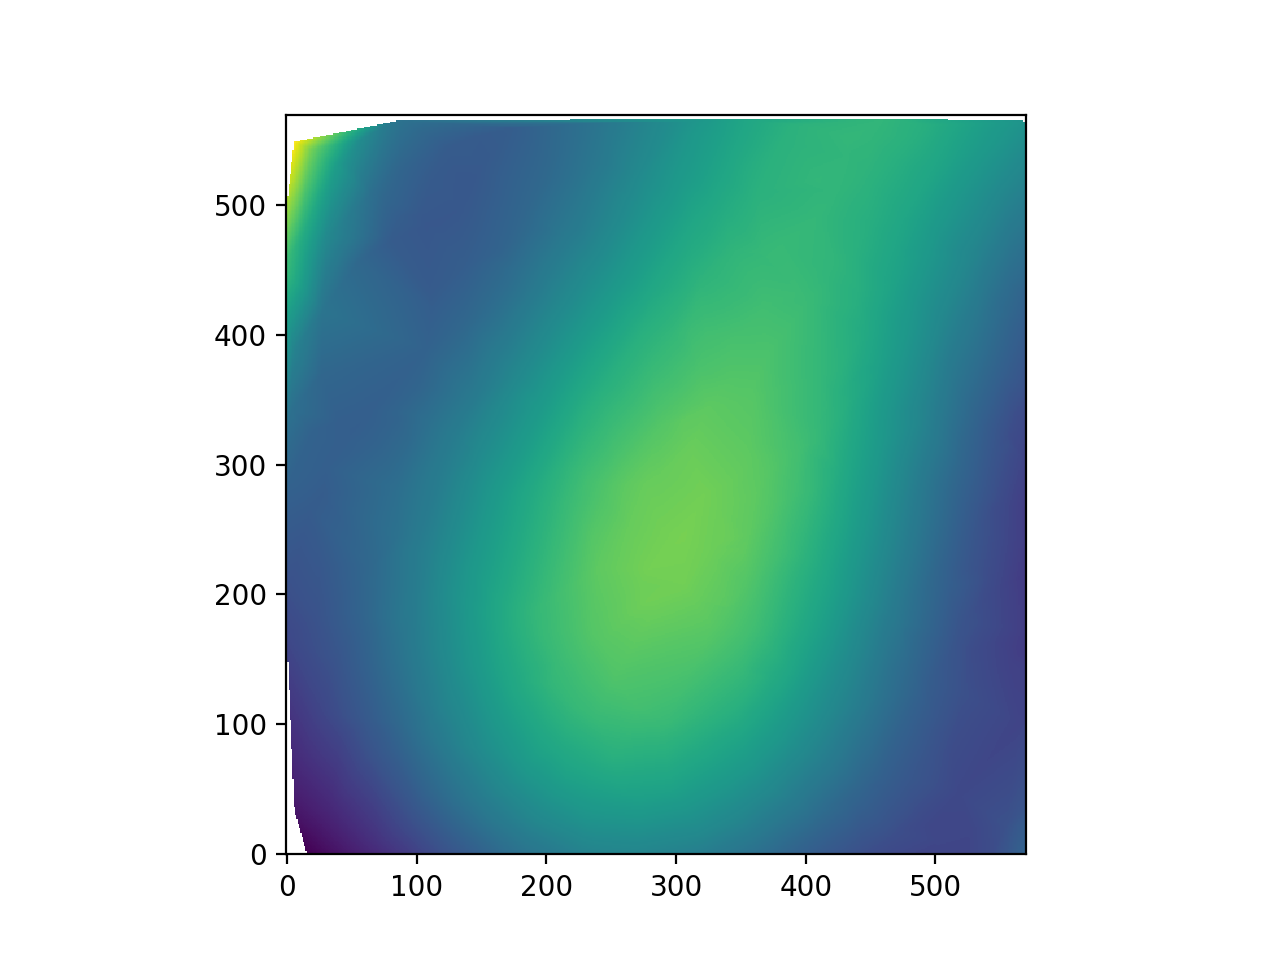

In [200]:
from scipy.interpolate import interp2d,griddata,LinearNDInterpolator,CloughTocher2DInterpolator
interp = LinearNDInterpolator(N.asarray([shapes['u'],shapes['v']]).T, shapes['T_model'])
#interp = CloughTocher2DInterpolator(N.asarray([shapes['u'],shapes['v']]).T, shapes['T_data'])

#interp = interp2d(shapes['u'],shapes['v'],shapes['T_data'])

print(interp(3000,-3000))
umin,umax,vmin,vmax = N.min(shapes['u']),N.max(shapes['u']),N.min(shapes['v']),N.max(shapes['v'])
u,v = N.mgrid[300:6000:10,-6000:-300:10]
print(u,v)
i = interp(u.ravel(),v.ravel()).reshape(u.shape)
fig, ax = P.subplots()
ax.imshow(i.T,origin='lower')

import pickle
with open('interpolator.pkl', 'wb') as f:
    pickle.dump(interp, f)
with open('interpolator.pkl', 'rb') as f:
    interp = pickle.load(f)
    
i = interp(u.ravel(),v.ravel()).reshape(u.shape)
fig, ax = P.subplots()
ax.imshow(i.T,origin='lower')